In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns
import collections


# Diameter of the graph

In [4]:
actors_agg_adj = np.load("agg_adj.npy")
actors_graph = nx.from_numpy_matrix(actors_agg_adj)


In [ ]:
print(f"The diameter of the graph is: {nx.diameter(actors_graph)}")

We can see that the graph is not connected, therefore we cannot calculate de diameter.

In [ ]:
Gc_actors = max(nx.connected_component_subgraphs(actors_graph), key=len)
print(f"The diameter of the graph is: {nx.diameter(Gc_actors)}")

# Sparsity of the graph

#### HeatMap

In [ ]:
# sns.heatmap(actors_agg_adj)

### Sparsity 

In [ ]:
plt.spy(actors_agg_adj)

# Connceted components

In [ ]:
connected_components = nx.number_connected_components(actors_graph)
connected_components

# Degree Distribution

In [ ]:
degree_sequence = sorted([d for n, d in actors_graph.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
plt.ylim([0,15])
plt.grid(True)

# Spectrum

In [ ]:
lamb_comb = nx.laplacian_spectrum(actors_graph)
lamb_norm = nx.normalized_laplacian_spectrum(actors_graph)

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(lamb_comb)
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues $L_{comb}$")
plt.subplot(122)
plt.plot(lamb_norm)
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues $L_{norm}$")
plt.show()

# Average Degree

In [ ]:
average_degree = nx.average_degree_connectivity(actors_graph)
average_degree

# Plot the Graph

In [ ]:
nx.draw(actors_graph)

C:\Users\AndresMontero\.conda\envs\ntds_2019\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


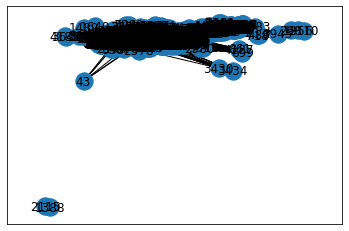

In [14]:
nx.draw_networkx(actors_graph)

In [19]:
# Graph-tool
g = Graph()
g.add_edge_list(np.transpose(actors_agg_adj[100:200,100:200].nonzero()))


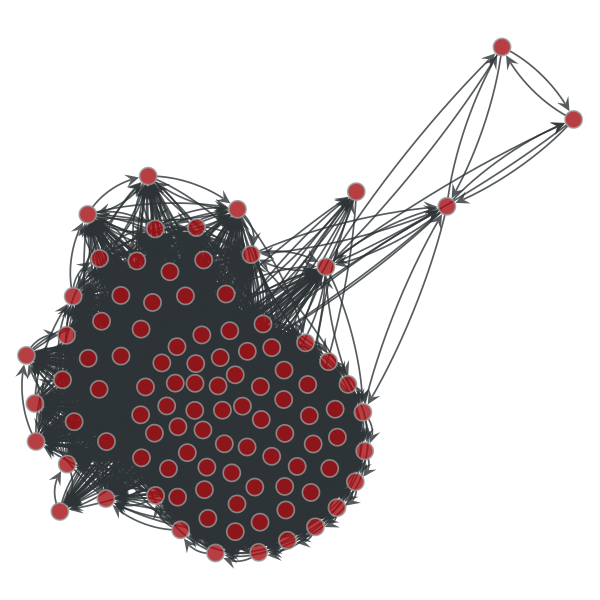

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x11a2bcd30, at 0x11a2bcef0>

In [20]:
gt.draw.graph_draw(g,fmt = "png",output_size=(600,600))

In [18]:
Gc_actors = max(nx.connected_component_subgraphs(actors_graph), key=len)
nb_edges_gc=Gc_actors.number_of_edges()
nb_nodes_gc=Gc_actors.number_of_nodes()
coords_Gc = nx.spring_layout(Gc_actors,k=0.03)  


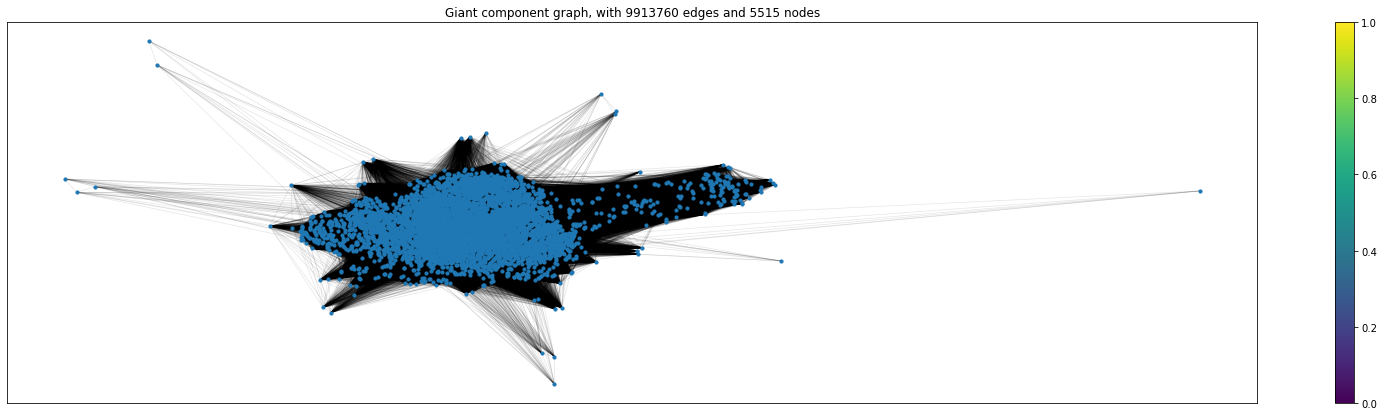

In [17]:
plt.figure(figsize=(28, 7))
im=nx.draw_networkx_nodes(Gc_actors, coords_Gc, node_size=10, cmap='tab20',vmin=0, vmax=20)
nx.draw_networkx_edges(Gc_actors, coords_Gc, alpha=0.1, width=0.7)
plt.title('Giant component graph, with {} edges and {} nodes'.format(nb_edges_gc,nb_nodes_gc))
plt.colorbar(im);